In [52]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v1 as tf

from tensorflow_privacy.privacy.analysis.rdp_accountant import compute_rdp
from tensorflow_privacy.privacy.analysis.rdp_accountant import get_privacy_spent

In [4]:
def compute_epsilon(steps, noise_multiplier, sampling_probability, delta = 1e-5):
    """Computes epsilon value for given hyperparameters."""
    if noise_multiplier == 0.0:
        return float('inf')
    orders = [1 + x / 10. for x in range(1, 100)] + list(range(12, 64))
    rdp = compute_rdp(q=sampling_probability,
                    noise_multiplier=noise_multiplier,
                    steps=steps,
                    orders=orders)
    # Delta is set to 1e-5 because MNIST has 60000 training points.
    return get_privacy_spent(orders, rdp, target_delta=delta)[0]


In [82]:
###### These are the parameters for training MNIST conv. NN with DP

steps_list = np.linspace(start=0, stop=60000*3, num=10)
noise_multiplier = 1.1
sampling_probability = 250/60000
delta = 1e-5

In [83]:
epsilons =[compute_epsilon(steps = st,
                            noise_multiplier=noise_multiplier,
                            sampling_probability=sampling_probability,
                            delta=delta) for st in steps_list]

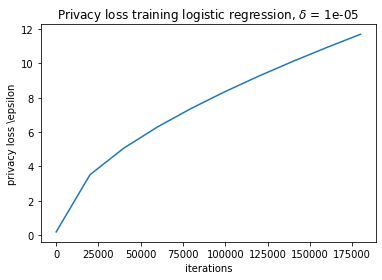

In [84]:
fig, axs = plt.subplots(1, 1)

axs.plot(steps_list, epsilons)
axs.set_xlabel('iterations')
axs.set_ylabel('privacy loss \epsilon')
axs.set_title('Privacy loss training logistic regression, $\delta$ = {}'.format(delta))
plt.show()


In [74]:
###### Our Parameters

# CAREFUL: in our paper we have sigma=noise_multiplier * D

steps_list = np.linspace(start=0, stop=60000*3, num=10)
noise_multiplier = 1.1
sampling_probability = 250/60000
delta = 1e-5

22026.465794806718